## Imports

pip install yellowbrick

In [1]:
from yellowbrick.target import FeatureCorrelation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

ModuleNotFoundError: No module named 'yellowbrick'

## Feature correlation

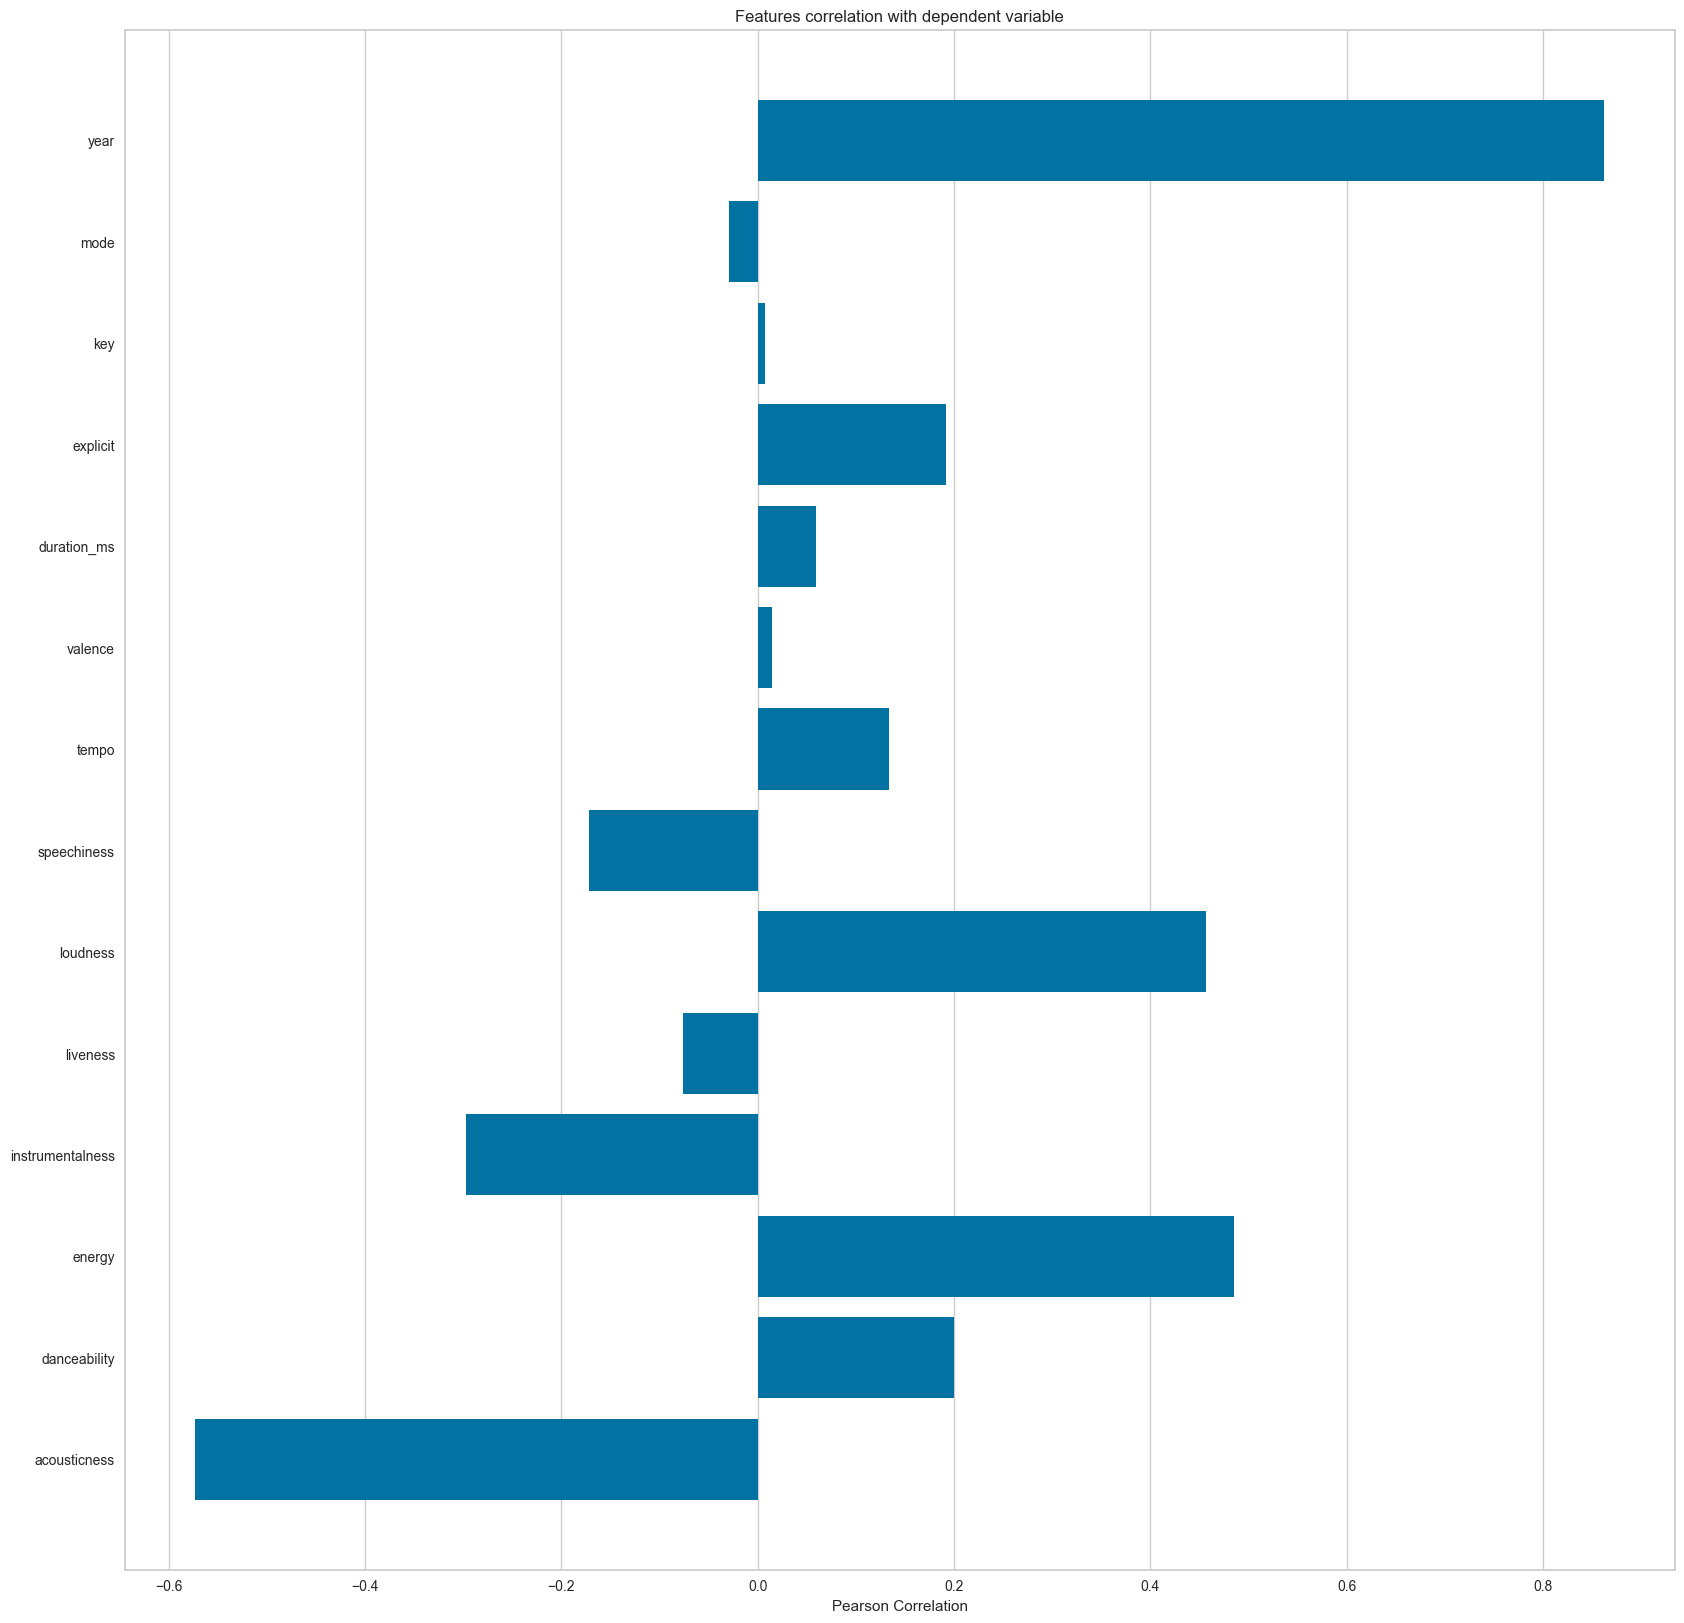

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
data = pd.read_csv("../data/data.csv")

feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(20,20)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.manifold import TSNE

# Transformateur personnalisé pour appliquer des poids
class FeatureWeighting(BaseEstimator, TransformerMixin):
    def __init__(self, weights):
        self.weights = weights

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X * self.weights

# Spécifiez les colonnes à inclure et les poids associés
feature_columns = [
    'mode', 'acousticness', 'danceability', 'duration_ms', 
    'energy', 'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'valence', 'popularity', 'key'
]
weights = np.array([1.5, 2.0, 1.0, 1.2, 0.8, 1.3, 1.0, 0.9, 1.1, 1.0, 1.0, 1.0, 1.4])  # Exemple de poids

# Extraction des données numériques
genre_data = pd.read_csv("../data/data_by_genres.csv")
X = genre_data[feature_columns].select_dtypes(np.number)

# Pipeline pour le clustering avec pondération
cluster_pipeline = Pipeline([
    ('weighting', FeatureWeighting(weights=weights)),
    ('scaler', StandardScaler()),
    ('kmeans', KMeans(n_clusters=30, n_init=30))
])

cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

# Pipeline pour la réduction de dimension avec t-SNE
tsne_pipeline = Pipeline([
    ('weighting', FeatureWeighting(weights=weights)),  # Appliquer les mêmes poids
    ('scaler', StandardScaler()),
    ('tsne', TSNE(n_components=2, verbose=1, random_state=42))
])
genre_embedding = tsne_pipeline.fit_transform(X)

# Préparer les données pour la visualisation
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

# Visualisation des clusters
fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres']
)
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.025s...
[t-SNE] Computed neighbors for 2973 samples in 0.357s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.777516
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.106316
[t-SNE] KL divergence after 1000 iterations: 1.392527


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

# Pipeline avec DBSCAN
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('dbscan', DBSCAN(eps=1.5, min_samples=5))  # Ajustez eps et min_samples selon votre dataset
])

# Sélectionner les colonnes numériques
X = genre_data.select_dtypes(include=['number'])

# Ajuster le pipeline et récupérer les labels
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline['dbscan'].labels_

# Visualisation des clusters avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])

genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.003s...
[t-SNE] Computed neighbors for 2973 samples in 0.307s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.836492
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.110214
[t-SNE] KL divergence after 1000 iterations: 1.055691


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
import plotly.express as px
import os

output_dir = "../data"

genres_clusters_path = os.path.join(output_dir, "genres_clusters.csv")
cluster_characteristics_path = os.path.join(output_dir, "cluster_characteristics.csv")

# Clustering
cluster_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=150, n_init=10))
])
X = genre_data.select_dtypes(include=['number'])
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

# Visualisation avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1))
])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

# Création du premier fichier CSV : genres et clusters associés
genres_clusters_csv = genre_data[['genres', 'cluster']]
genres_clusters_csv.to_csv(genres_clusters_path, index=False)
print(f"Fichier '{genres_clusters_path}' généré avec succès.")

# Filtrer les colonnes numériques uniquement
numeric_cols = genre_data.select_dtypes(include=['number']).columns

# Création du deuxième fichier CSV : clusters et caractéristiques moyennes
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()

# Réinitialisation de l'index et gestion du conflit avec la colonne 'cluster'
cluster_means['cluster'] = cluster_means.index  # Ajoute 'cluster' en tant que colonne
cluster_means.reset_index(drop=True, inplace=True)  # Réinitialise l'index sans dupliquer 'cluster'

# Sauvegarde des caractéristiques moyennes des clusters dans un fichier CSV
cluster_means.to_csv(cluster_characteristics_path, index=False)
print(f"Fichier '{cluster_characteristics_path}' généré avec succès.")


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.002s...
[t-SNE] Computed neighbors for 2973 samples in 1.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 0.794541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.559494
[t-SNE] KL divergence after 1000 iterations: 1.330895


Fichier '../data/genres_clusters.csv' généré avec succès.
Fichier '../data/cluster_characteristics.csv' généré avec succès.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import plotly.express as px

# Chargement des données
genre_data = pd.read_csv("../data/data_by_genres.csv")  # Remplacez par votre chemin
genre_data['genres_names'] = genre_data['genres']  # Assurez-vous que cette colonne existe

# Étape 1 : Vectorisation des noms de genres avec TF-IDF
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2))  # Bigrammes pour capturer plus de contexte
genre_name_vectors = vectorizer.fit_transform(genre_data['genres_names'])

# Étape 2 : Réduction de la dimensionnalité des noms de genres
svd = TruncatedSVD(n_components=10, random_state=42)  # Réduction à 10 dimensions
reduced_name_vectors = svd.fit_transform(genre_name_vectors)

# Étape 3 : Préparation des caractéristiques numériques
numeric_features = genre_data.select_dtypes(include=['number']).values

# Étape 4 : Fusion des vecteurs réduits avec les caractéristiques numériques
X_combined = np.hstack((numeric_features, reduced_name_vectors))

# Étape 5 : Clustering avec KMeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

kmeans = KMeans(n_clusters=18, random_state=42)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)
genre_data['cluster'] = np.where(genre_data['cluster'] == 14, 0, genre_data['cluster'])
genre_data['cluster'] = genre_data['cluster'].replace({15: 14, 16: 15, 17: 16})


# Étape 6 : Visualisation avec t-SNE
tsne_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('tsne', TSNE(n_components=2, verbose=1, random_state=42, perplexity=30))
])
genre_embedding = tsne_pipeline.fit_transform(X_combined)

projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres_names']
projection['cluster'] = genre_data['cluster']

# Étape 7 : Affichage avec Plotly
fig = px.scatter(
    projection, x='x', y='y', color=projection['cluster'].astype(str), 
    hover_data=['genres'], title="Visualisation des clusters de genres avec t-SNE"
)
fig.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2973 samples in 0.000s...
[t-SNE] Computed neighbors for 2973 samples in 0.080s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2973
[t-SNE] Computed conditional probabilities for sample 2000 / 2973
[t-SNE] Computed conditional probabilities for sample 2973 / 2973
[t-SNE] Mean sigma: 1.046160
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.960464
[t-SNE] KL divergence after 1000 iterations: 1.006405


In [ ]:
from collections import Counter

# Création du premier fichier CSV : genres et clusters associés
genres_clusters_csv = genre_data[['genres', 'cluster']]
genres_clusters_csv.to_csv(genres_clusters_path, index=False)
print(f"Fichier '{genres_clusters_path}' généré avec succès.")

# Filtrer les colonnes numériques uniquement
numeric_cols = genre_data.select_dtypes(include=['number']).columns

# Création du deuxième fichier CSV : clusters et caractéristiques moyennes
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()

# Fonction pour générer un nom de cluster
def generate_cluster_name(genres):
    # Récupérer tous les mots des noms de genres
    all_words = [word for genre in genres for word in genre.split()]
    
    # Calculer la fréquence des mots
    word_freq = Counter(all_words)
    
    # Identifier les mots les plus fréquents
    most_common_words = [word for word, count in word_freq.most_common(5)]
    
    """# Exemple de logique manuelle pour des regroupements connus
    if any(word in most_common_words for word in ['rap', 'hip-hop']):
        return "Rap/Hip-Hop"
    elif any(word in most_common_words for word in ['rock', 'alternative']):
        return "Rock/Alternative"
    elif any(word in most_common_words for word in ['pop', 'dance']):
        return "Pop/Dance"
    elif any(word in most_common_words for word in ['classical', 'symphony']):
        return "Classical"
    elif any(word in most_common_words for word in ['jazz', 'blues']):
        return "Jazz/Blues"
    else:
        # Si aucun regroupement explicite, concaténer les mots les plus fréquents"""
    return " / ".join(most_common_words[:3])

"""# Grouper les noms de genres par cluster
cluster_names = (
    genre_data.groupby('cluster')['genres']
    .apply(lambda genres: generate_cluster_name(genres))
    .to_dict()
)"""

cluster_names = ['Ambient', 'Fusion Beat', 'Fusion Hardcore', 'Metal', 'Jazz', 'Rock', 'World & Electronic Music', 'Punk', 'Folk', 'Traditional Music', 'Indie', 'Blues, Soul & Country', 'Hip Hop', 'Classical', 'Comedy, Literature & Cultural Narratives', 'Pop', 'Rap']

# Création du DataFrame pour les caractéristiques moyennes et les noms
cluster_means = genre_data.groupby('cluster')[numeric_cols].mean()
#cluster_means['cluster_name'] = cluster_means.index.map(cluster_names)

# Réinitialisation de l'index
cluster_means['cluster'] = cluster_means.index  # Ajoute 'cluster' en tant que colonne
cluster_means.reset_index(drop=True, inplace=True)  # Réinitialise l'index sans dupliquer 'cluster'
cluster_means['name'] = cluster_names

# Affichage des clusters et leurs caractéristiques moyennes
print(cluster_means)

cluster_means.to_csv("../data/cluster_characteristics.csv", index=False)



print(cluster_names)

# Afficher les genres par cluster
grouped_genres = genre_data.groupby('cluster')['genres'].apply(lambda x: ', '.join(x)).reset_index()

# Afficher les résultats
for _, row in grouped_genres.iterrows():
    print(f"Cluster {row['cluster']} : {row['genres']}")


Fichier '../data/genres_clusters.csv' généré avec succès.
        mode  acousticness  danceability    duration_ms    energy  \
0   0.858238      0.835641      0.327995  302721.971724  0.203783   
1   1.000000      0.238664      0.676874  238388.648177  0.673430   
2   0.983660      0.124013      0.496772  276177.109427  0.757403   
3   0.787879      0.037851      0.378971  285589.855018  0.857580   
4   0.854167      0.649975      0.528153  280897.039655  0.373148   
5   0.881081      0.232945      0.522893  253380.524922  0.670808   
6   0.000000      0.262176      0.619616  256750.503483  0.670809   
7   0.938272      0.101093      0.472754  216263.276617  0.811181   
8   0.876543      0.605816      0.516035  240667.998279  0.409877   
9   0.912821      0.849086      0.512015  204748.931495  0.355002   
10  0.857143      0.282898      0.558134  237983.392341  0.621464   
11  0.986928      0.573986      0.552822  225397.945789  0.437532   
12  0.780000      0.221919      0.695518  243

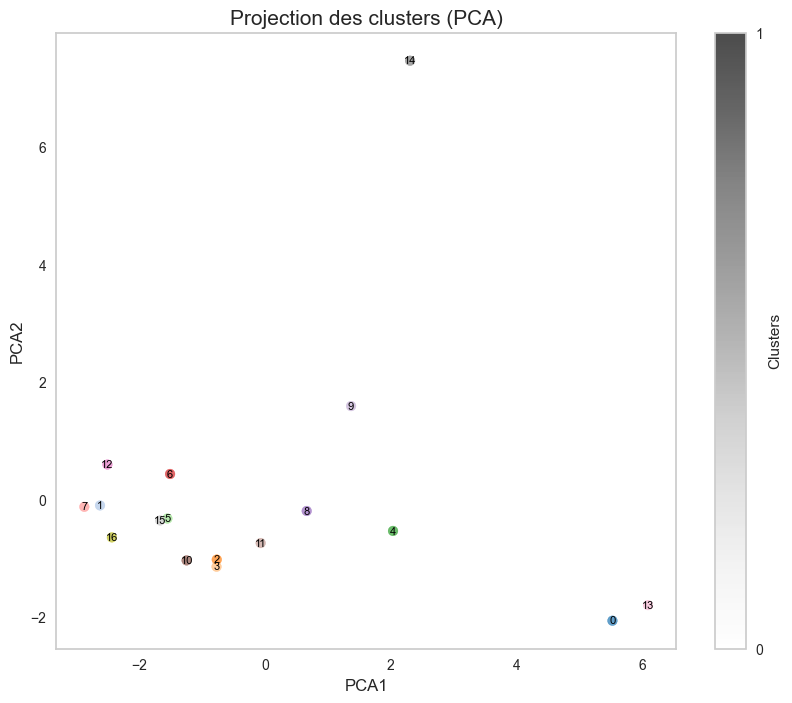

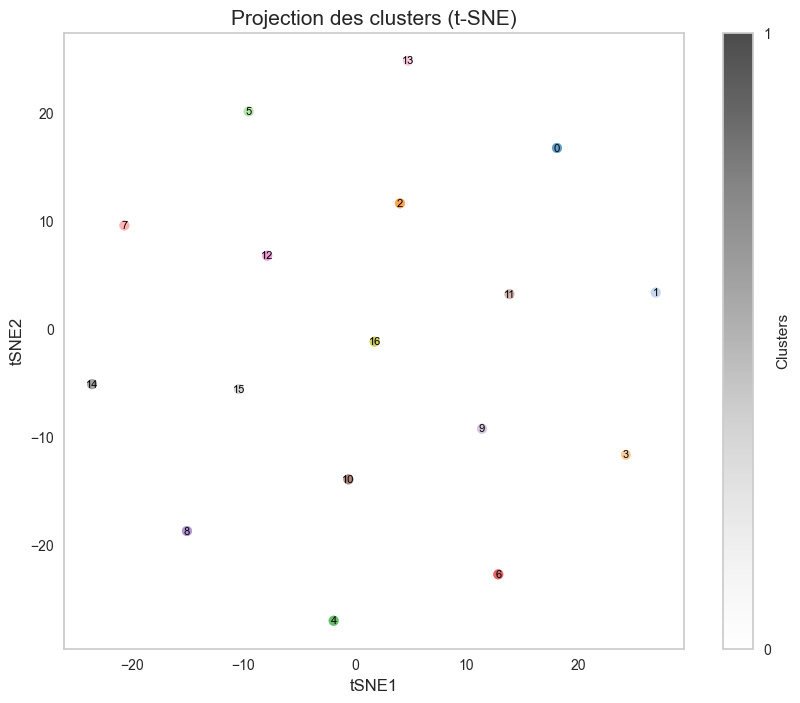

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Charger les données
cluster_data = cluster_means

# Sélectionner les caractéristiques numériques uniquement
features = cluster_data.drop(columns=['cluster', 'name'])

# Standardiser les données
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Appliquer PCA pour réduction à 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_features)

# Ajouter les résultats PCA dans le DataFrame
cluster_data['PCA1'] = pca_result[:, 0]
cluster_data['PCA2'] = pca_result[:, 1]

# Tracer le scatter plot pour PCA
plt.figure(figsize=(10, 8))
colors = plt.cm.tab20(cluster_data['cluster'].astype('category').cat.codes)  # Colormap avec couleurs uniques par cluster
plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], c=colors, alpha=0.7)

# Annoter les points avec le numéro de cluster
for i, row in cluster_data.iterrows():
    plt.text(row['PCA1'], row['PCA2'], str(row['cluster']), fontsize=8, ha='center', va='center', color='black')

plt.title('Projection des clusters (PCA)', fontsize=15)
plt.xlabel('PCA1', fontsize=12)
plt.ylabel('PCA2', fontsize=12)
plt.colorbar(label="Clusters", ticks=range(cluster_data['cluster'].nunique()))
plt.grid()
plt.show()

# Appliquer t-SNE pour une autre réduction de dimensionnalité
# Réduire perplexity si dataset petit
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(cluster_data) - 1))
tsne_result = tsne.fit_transform(standardized_features)

# Ajouter les résultats t-SNE dans le DataFrame
cluster_data['tSNE1'] = tsne_result[:, 0]
cluster_data['tSNE2'] = tsne_result[:, 1]

# Tracer le scatter plot pour t-SNE
plt.figure(figsize=(10, 8))
plt.scatter(cluster_data['tSNE1'], cluster_data['tSNE2'], c=colors, alpha=0.7)

# Annoter les points avec le numéro de cluster
for i, row in cluster_data.iterrows():
    plt.text(row['tSNE1'], row['tSNE2'], str(row['cluster']), fontsize=8, ha='center', va='center', color='black')

plt.title('Projection des clusters (t-SNE)', fontsize=15)
plt.xlabel('tSNE1', fontsize=12)
plt.ylabel('tSNE2', fontsize=12)
plt.colorbar(label="Clusters", ticks=range(cluster_data['cluster'].nunique()))
plt.grid()
plt.show()


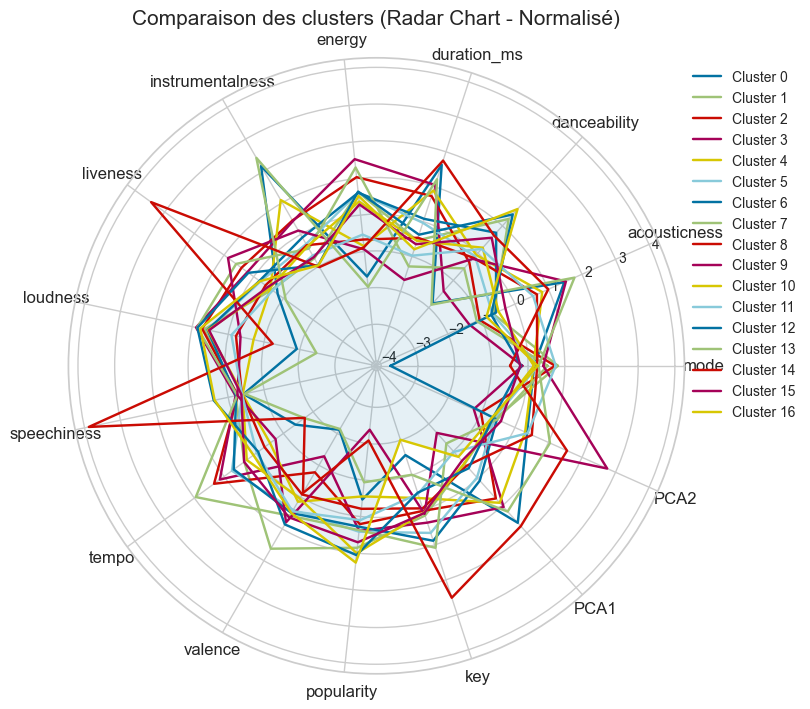

In [ ]:
from math import pi
from sklearn.preprocessing import StandardScaler

# Sélectionner les caractéristiques numériques uniquement
features = cluster_means.drop(columns=['cluster', 'name'])

# Standardiser les caractéristiques (moyenne = 0, écart type = 1)
scaler = StandardScaler()
standardized_features = scaler.fit_transform(features)

# Ajouter les caractéristiques normalisées au DataFrame
standardized_data = pd.DataFrame(
    standardized_features, columns=features.columns, index=cluster_means.index
)
standardized_data['cluster'] = cluster_means['cluster']

# Calcul des moyennes des caractéristiques par cluster
clusters_avg = standardized_data.groupby('cluster').mean()

# Initialisation des variables pour le radar chart
categories = clusters_avg.columns
num_vars = len(categories)

# Création des angles pour le radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Boucler le graphe

# Tracer le radar chart
plt.figure(figsize=(10, 8))
for cluster in clusters_avg.index:
    values = clusters_avg.loc[cluster].tolist()
    values += values[:1]  # Boucler le graphe
    plt.polar(angles, values, label=f'Cluster {cluster}')

plt.xticks(angles[:-1], categories, fontsize=12)
plt.fill(angles, values, alpha=0.1)  # Ajout de la zone remplie
plt.title('Comparaison des clusters (Radar Chart - Normalisé)', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


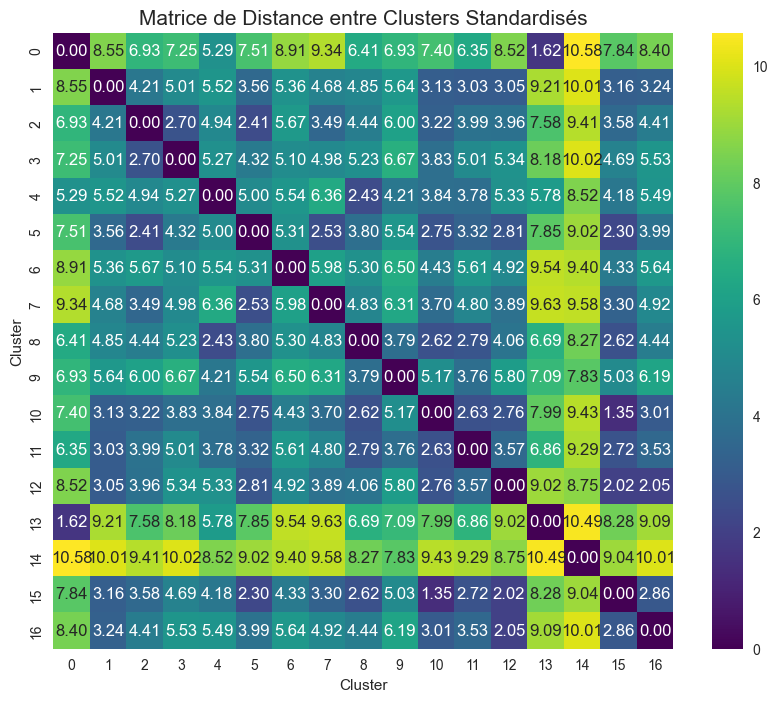

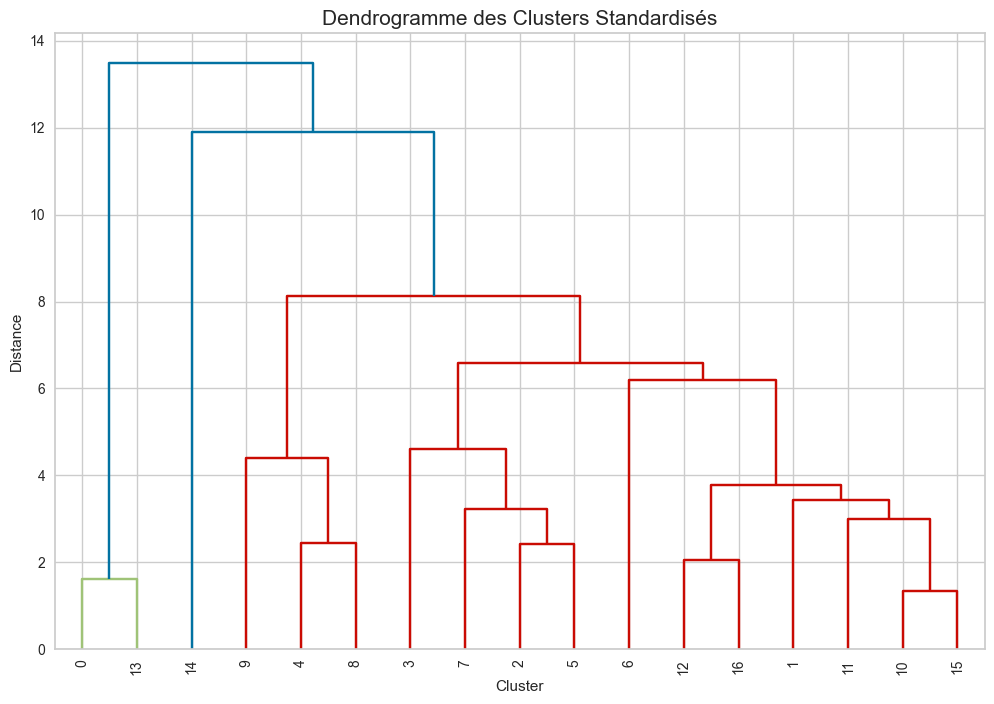

In [ ]:
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

#cluster_means = cluster_means.drop(columns=["cluster", "name"])

scaler = StandardScaler()
standardized_means = scaler.fit_transform(cluster_means)

# Calculer la matrice de distance (euclidienne entre clusters standardisés)
dist_matrix = pdist(standardized_means, metric='euclidean')  # Distance pairwise
dist_square_matrix = squareform(dist_matrix)  # Convertir en matrice carrée

# Visualisation : Heatmap des distances
plt.figure(figsize=(10, 8))
sns.heatmap(dist_square_matrix, xticklabels=cluster_means.index, yticklabels=cluster_means.index, 
            cmap='viridis', annot=True, fmt=".2f")
plt.title("Matrice de Distance entre Clusters Standardisés", fontsize=15)
plt.xlabel("Cluster")
plt.ylabel("Cluster")
plt.show()

# Appliquer un clustering hiérarchique
linkage_matrix = linkage(dist_matrix, method='ward')

# Visualisation : Dendrogramme des clusters
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=cluster_means.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogramme des Clusters Standardisés", fontsize=15)
plt.xlabel("Cluster")
plt.ylabel("Distance")
plt.show()


   cluster                              cluster_name folk country classical  \
0        0                                   Ambient    1       1         1   
1        1                               Fusion Beat    2      10         0   
2        2                           Fusion Hardcore    0       0         0   
3        3                                     Metal    1       0         1   
4        4                                      Jazz    0       0         0   
5        5                                      Rock    0       2         0   
6        6                  World & Electronic Music    2       0         0   
7        7                                      Punk    0       0         0   
8        8                                      Folk   81       1         0   
9        9                         Traditional Music    3       3         1   
10      10                                     Indie    0       0         0   
11      11                     Blues, Soul & Country

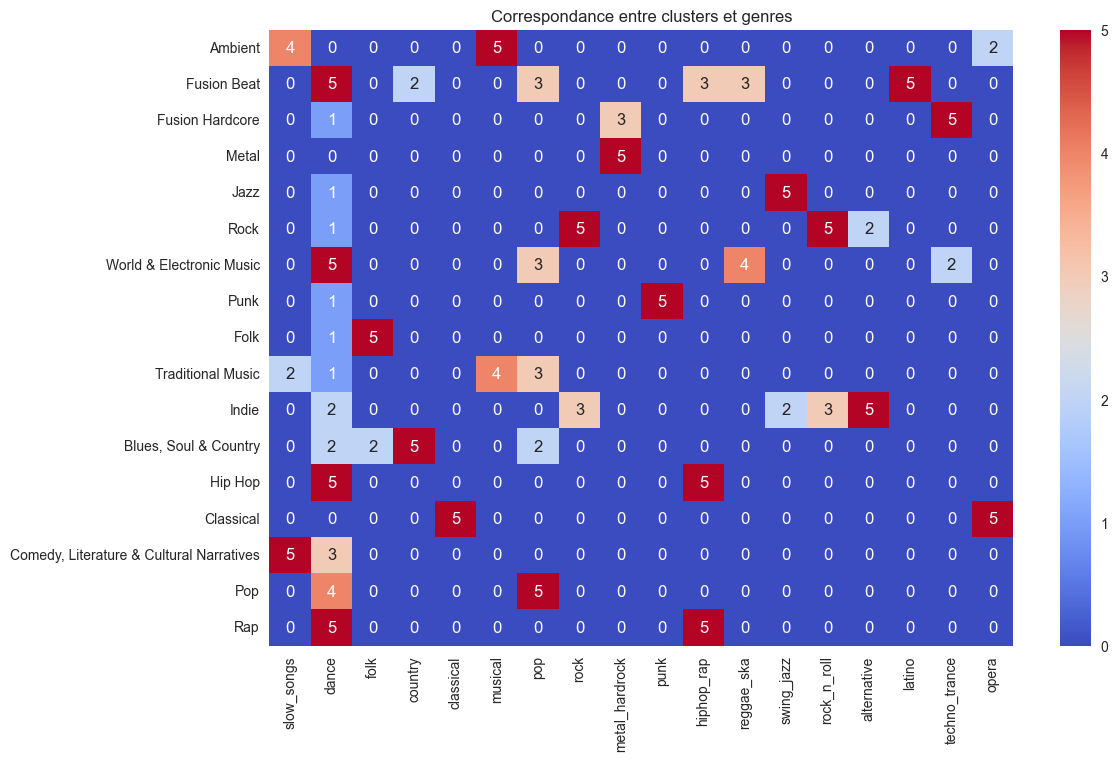

In [ ]:
# Liste des clusters
cluster_names = [
    'Ambient', 'Fusion Beat', 'Fusion Hardcore', 'Metal', 'Jazz', 'Rock',
    'World & Electronic Music', 'Punk', 'Folk', 'Traditional Music', 'Indie',
    'Blues, Soul & Country', 'Hip Hop', 'Classical', 'Comedy, Literature & Cultural Narratives',
    'Pop', 'Rap'
]

# Genres musicaux dans la base de profils
profile_genres = [
    'slow_songs', 'dance', 'folk', 'country', 'classical', 'musical', 'pop', 'rock',
    'metal_hardrock', 'punk', 'hiphop_rap', 'reggae_ska', 'swing_jazz', 'rock_n_roll',
    'alternative', 'latino', 'techno_trance', 'opera'
]

profile_genres_adaptee = [
    'folk', 'country', 'classical', 'pop', 'rock',
    'metal', 'punk', 'hip hop', 'rap', 'reggae', 'jazz',
    'alternative', 'latino', 'techno', 'opera'
]

cluster_counts = pd.DataFrame(columns=['cluster', 'cluster_name'] + profile_genres_adaptee)

# Itérer sur les clusters uniques, triés dans l'ordre croissant
for cluster in sorted(genres_clusters_csv['cluster'].unique()):
    # Filtrer les genres du cluster courant
    cluster_genres = genres_clusters_csv[genres_clusters_csv['cluster'] == cluster]['genres']

    # Compter les occurrences pour chaque genre de profil
    counts = {genre: cluster_genres.str.contains(genre, case=False, na=False).sum() for genre in profile_genres_adaptee}

    # Ajouter les résultats au DataFrame, y compris le nom du cluster
    cluster_counts = pd.concat([cluster_counts, pd.DataFrame([{
        **{'cluster': cluster, 'cluster_name': cluster_names[cluster]}, **counts
    }])], ignore_index=True)

# Afficher les résultats (ignorer pour slow_songs, dance et musical je me suis refere directement au stats des clusters pour ces catégories)
print(cluster_counts)


# Matrice de correspondance avec des notes arbitraires (exemple)
correspondence_matrix = pd.DataFrame(
    [
        # Correspondances pour chaque cluster (0-5 pour chaque genre du profil)
        [4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],  # Ambient
        [0, 5, 0, 2, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 5, 0, 0],  # Fusion Beat
        [0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 5, 0],  # Fusion Hardcore
        [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Metal
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0],  # Jazz
        [0, 1, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 5, 2, 0, 0, 0],  # Rock
        [0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0],  # World & Electronic Music
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0],  # Punk
        [0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Folk
        [2, 1, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Traditional Music
        [0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 5, 0, 0, 0],  # Indie
        [0, 2, 2, 5, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Blues, Soul & Country
        [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],  # Hip Hop
        [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5],  # Classical
        [5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Comedy, Literature & Cultural Narratives
        [0, 4, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  # Pop
        [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]   # Rap
    ],
    index=cluster_names,
    columns=profile_genres
)


#print(correspondence_matrix.loc['Ambient'])

# Afficher une heatmap des correspondances pour une meilleure visualisation
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correspondence_matrix, annot=True, cmap='coolwarm', fmt="d")
plt.title("Correspondance entre clusters et genres")
plt.show()


In [ ]:
# Charger les fichiers nécessaires
cleaned_profiles = pd.read_csv('../data/cleaned_profils.csv')

# Initialiser les colonnes des nouveaux genres (cluster_names)
for cluster_name in cluster_names:
    cleaned_profiles[cluster_name] = 0  # Initialise les nouvelles colonnes à 0

# Calculer la somme des coefficients pour chaque ligne de la matrice
row_sums = correspondence_matrix.sum(axis=1)

for profile_genre in profile_genres:
    if profile_genre in cleaned_profiles.columns:
        for cluster_name in cluster_names:
            # Diviser par la somme des coefficients pour pondérer
            weight = correspondence_matrix.loc[cluster_name, profile_genre] / row_sums[cluster_name]
            cleaned_profiles[cluster_name] += (
                cleaned_profiles[profile_genre] * weight
            )
         


# Supprimer les colonnes des anciens genres musicaux (profile_genres)
cleaned_profiles.drop(columns=profile_genres, inplace=True)

# Sauvegarder le nouveau fichier CSV
cleaned_profiles.to_csv('../data/cleaned_profils_with_clusters.csv', index=False)

print("Nouveau fichier créé : 'cleaned_profils_with_clusters.csv'")


Nouveau fichier créé : 'cleaned_profils_with_clusters.csv'


In [ ]:
year_data = pd.read_csv("../data/data_by_year.csv")

sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence', 'speechiness']
fig = px.line(year_data, x='year', y=sound_features)
fig.show()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def get_recommandations_from_music(id_music, n_recommandations):
    # Chargement des données
    data = pd.read_csv('../data/data_w_clusters.csv')

    # On récupère le cluster de la musique
    cluster = data[data['id'] == id_music]['cluster'].values[0]
    
    # On récupère les musiques du même cluster
    musics = data[data['cluster'] == cluster]
    
    # On cherche les n_recommandations musiques les plus proches
    # On calcule la distance entre les musiques à l'aide des attributs 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    #                                                                  'instrumentalness', 'liveness', 'valence', 'tempo'
    # On utilise la distance euclidienne
    
    # Extraire les colonnes pertinentes pour le calcul des distances
    feature_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    
    # Trouver les attributs de la musique cible
    target_music_features = data.loc[data['id'] == id_music, feature_columns].values
    
    # Filtrer les musiques autres que celle ciblée
    other_musics = musics[musics['id'] != id_music]
    
    # Calculer les distances euclidiennes en masse
    other_features = other_musics[feature_columns].values
    distances = euclidean_distances(target_music_features, other_features).flatten()
    
    # Associer les distances aux IDs
    recommandations = list(zip(other_musics['id'].values, distances))
    
    # Trier les recommandations par distance
    recommandations.sort(key=lambda x: x[1])
    recommandations = recommandations[:min(n_recommandations, len(recommandations))]
    
    for x in recommandations:
        print(x[1])
    
    # On retourne les id des musiques recommandées
    return [x[0] for x in recommandations]

def get_recommandations_hors_cluster(id_music, n_recommandations):
    # Chargement des données
    musics = pd.read_csv('../data/data_w_clusters.csv')
        
    # On cherche les n_recommandations musiques les plus proches
    # On calcule la distance entre les musiques à l'aide des attributs 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    #                                                                  'instrumentalness', 'liveness', 'valence', 'tempo'
    # On utilise la distance euclidienne
    
    # Extraire les colonnes pertinentes pour le calcul des distances
    feature_columns = ['danceability', 'energy', 'loudness', 'speechiness', 
                       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    
    # Trouver les attributs de la musique cible
    target_music_features = data.loc[data['id'] == id_music, feature_columns].values
    
    # Filtrer les musiques autres que celle ciblée
    other_musics = musics[musics['id'] != id_music]
    
    # Calculer les distances euclidiennes en masse
    other_features = other_musics[feature_columns].values
    distances = euclidean_distances(target_music_features, other_features).flatten()
    
    # Associer les distances aux IDs
    recommandations = list(zip(other_musics['id'].values, distances))
    
    # Trier les recommandations par distance
    recommandations.sort(key=lambda x: x[1])
    recommandations = recommandations[:min(n_recommandations, len(recommandations))]
    
    for x in recommandations:
        print(x[1])
    
    # On retourne les id des musiques recommandées
    return [x[0] for x in recommandations]


In [ ]:
data = pd.read_csv('../data/data_w_clusters.csv')
genres = pd.read_csv('../data/cluster_characteristics.csv')

random_id = data['id'].sample().values[0]

music_name = data[data['id'] == random_id]['name'].values[0]
music_cluster = data[data['id'] == random_id]['cluster'].values[0]
print(music_name, music_cluster)

Eternal Youth 2


In [ ]:
rep = get_recommandations_from_music(random_id, 50)

for i in rep:
    cluster_info = data.loc[data['id'] == i, ['name', 'cluster']].iloc[0]
    print(cluster_info['name'], cluster_info['cluster'])

In [ ]:
rep = get_recommandations_hors_cluster(random_id, 50)

for i in rep:
    cluster_info = data.loc[data['id'] == i, ['name', 'cluster']].iloc[0]
    print(cluster_info['name'], cluster_info['cluster'])

In [ ]:
# Colonnes pour les caractéristiques
feature_columns = [
    'mode', 'acousticness', 'danceability', 'duration_ms', 
    'energy', 'instrumentalness', 'liveness', 'loudness', 
    'speechiness', 'tempo', 'valence', 'popularity', 'key'
]
genre_columns = [
    'Ambient', 'Fusion Beat', 'Fusion Hardcore', 'Metal', 'Jazz', 'Rock',
    'World & Electronic Music', 'Punk', 'Folk', 'Traditional Music', 'Indie',
    'Blues, Soul & Country', 'Hip Hop', 'Classical', 'Comedy, Literature & Cultural Narratives',
    'Pop', 'Rap'
]

# Fonction principale mise à jour
def get_recommandations_hors_cluster_adapt(id_music, n_recommandations, feature_weights, genre_weights):
    """
    Recommande des musiques hors cluster avec pondération adaptative.

    - id_music : ID de la musique cible.
    - n_recommandations : Nombre de recommandations souhaitées.
    - feature_weights : Poids pour les caractéristiques des musiques.
    - genre_weights : Poids pour les genres musicaux.
    """
    # Chargement des données
    musics = pd.read_csv('../data/data_w_clusters.csv')

    # Vérification de la colonne 'cluster' dans le dataset
    if 'cluster' not in musics.columns:
        print("Erreur : La colonne 'cluster' n'est pas présente dans le dataset.")
        return []

    # Trouver les caractéristiques de la musique cible
    target_music_features = musics.loc[musics['id'] == id_music, feature_columns].values
    if target_music_features.shape[0] == 0:
        raise ValueError(f"La musique avec l'ID {id_music} est introuvable dans le dataset.")

    # Trouver le genre (cluster) de la musique cible
    target_music_cluster = musics.loc[musics['id'] == id_music, 'cluster'].values[0]

    # Filtrer les autres musiques
    other_musics = musics[musics['id'] != id_music]
    other_features = other_musics[feature_columns].values
    other_clusters = other_musics['cluster'].values  # Récupérer les clusters des autres musiques

    # Standardisation des caractéristiques
    standardized_features = StandardScaler().fit_transform(np.vstack([target_music_features, other_features]))
    target_music_features = standardized_features[0]
    other_features = standardized_features[1:]

    # Application des poids
    weighted_target_features = target_music_features * feature_weights
    weighted_other_features = other_features * feature_weights

    # Calcul des distances pondérées pour les caractéristiques
    feature_distances = euclidean_distances(
        weighted_target_features.reshape(1, -1), weighted_other_features
    ).flatten()

    # Application des poids sur les genres (clusters)
    target_genre_weights = np.zeros(len(genre_columns))
    target_genre_weights[target_music_cluster] = genre_weights[target_music_cluster]  # Pondérer le genre de la musique cible
    weighted_target_genre = target_genre_weights  # Pas besoin de multiplication ici, simplement un vecteur de poids

    # Calcul des distances entre les genres
    genre_distances = np.abs(other_clusters - target_music_cluster)  # Distance entre les clusters

    # Assurez-vous que le vecteur de poids est répété pour chaque musique
    weighted_genre_distances = genre_distances * weighted_target_genre[other_clusters]

    # Combinaison des distances (caractéristiques + genres)
    total_distances = feature_distances + weighted_genre_distances

    # Trier les recommandations par distance (les plus proches en premier)
    recommandations = list(zip(other_musics['id'].values, total_distances))
    recommandations.sort(key=lambda x: x[1])
    recommandations = recommandations[:min(n_recommandations, len(recommandations))]

    # Affichage des recommandations et mise à jour des poids
    print("Recommandations :")
    for rec in recommandations:
        music_name = musics.loc[musics['id'] == rec[0], 'name'].values[0]
        music_genre = musics.loc[musics['id'] == rec[0], 'cluster'].values[0]
        print(f"ID: {rec[0]}, Name: {music_name}, Distance: {rec[1]:.4f}, Cluster: {music_genre}")

        # Demander à l'utilisateur si la musique est aimée
        liked = np.random.choice([True, False])
        print(liked)
        
        # Mettre à jour les poids
        music_id = rec[0]
        recommended_features = musics.loc[musics['id'] == music_id, feature_columns].values.flatten()
        recommended_cluster = musics.loc[musics['id'] == music_id, 'cluster'].values[0]

        # Le genre est l'indice du cluster dans genre_columns
        recommended_genres = np.zeros(len(genre_columns))
        recommended_genres[recommended_cluster] = 1

        # Mettre à jour les poids des caractéristiques et des genres
        feature_weights = update_weights(feature_weights, recommended_features, liked)
        genre_weights = update_weights(genre_weights, recommended_genres, liked, 0.15)

    # Retourner les IDs des musiques recommandées
    return [x[0] for x in recommandations]

# Fonction pour mettre à jour les poids en fonction des retours utilisateur
def update_weights(weights, target, liked, learning_rate=0.1):
    """
    Met à jour les poids en fonction des retours utilisateur.

    - weights : Poids actuels (caractéristiques ou genres).
    - target : Valeurs associées à la musique cible (caractéristiques ou genres).
    - liked : Booléen indiquant si l'utilisateur a aimé la recommandation.
    - learning_rate : Taux d'apprentissage.
    """
    #factor = 1 if liked else -1
    factor = 1 if liked else -2
    weights += factor * learning_rate * target
    #return np.clip(weights, 0, 1)  # Conserver les poids entre 0 et 1
    return np.clip(weights, 0, 2)  # Conserver les poids entre 0 et 2

# Exemple d'utilisation
if __name__ == "__main__":
    # Initialiser les poids (tous égaux à 1 au départ)
    feature_weights = np.ones(13)  # 13 colonnes de caractéristiques
    genre_weights = np.ones(17)    # 17 genres musicaux

    # ID de la musique cible
    id_music = random_id  # Remplacez par un ID valide de votre dataset

    # Obtenir des recommandations
    recommandations = get_recommandations_hors_cluster_adapt(
        id_music, n_recommandations=5, feature_weights=feature_weights, genre_weights=genre_weights
    )


Recommandations :
ID: 7g8cjrj0sXScNE727685JE, Name: Kernkraft 400 - DJ Gius Mix, Radio Edit, Distance: 1.6511, Cluster: 10
True
ID: 5xKVYMxOHB2XRLCUafFrz6, Name: Dream Is Collapsing, Distance: 1.8944, Cluster: 2
False
ID: 6Lg1GvSIe1Tr1EHsM76aEj, Name: Meet Her At The Loveparade (Radio Edit), Distance: 1.9289, Cluster: 2
True
ID: 7cMFjxhbXBpOlais7KMF3j, Name: Voyager, Distance: 1.9341, Cluster: 2
False
ID: 5IzZpz0vA73IIjqFPpXSXP, Name: Attack on Titan, Distance: 1.9470, Cluster: 2
True


In [ ]:
feature_weights = np.ones(13)  # 13 colonnes de caractéristiques
genre_weights = np.ones(17)    # 17 genres musicaux

id_music = random_id  # Remplacez par un ID valide de votre dataset

# Obtenir des recommandations
recommandations = get_recommandations_hors_cluster_adapt(
    id_music, n_recommandations=10, feature_weights=feature_weights, genre_weights=genre_weights
)

Recommandations :
ID: 7g8cjrj0sXScNE727685JE, Name: Kernkraft 400 - DJ Gius Mix, Radio Edit, Distance: 1.6511, Cluster: 10
True
ID: 5xKVYMxOHB2XRLCUafFrz6, Name: Dream Is Collapsing, Distance: 1.8944, Cluster: 2
False
ID: 6Lg1GvSIe1Tr1EHsM76aEj, Name: Meet Her At The Loveparade (Radio Edit), Distance: 1.9289, Cluster: 2
True
ID: 7cMFjxhbXBpOlais7KMF3j, Name: Voyager, Distance: 1.9341, Cluster: 2
False
ID: 5IzZpz0vA73IIjqFPpXSXP, Name: Attack on Titan, Distance: 1.9470, Cluster: 2
True
ID: 2HO0uCyq8jOveEzvmo4JEu, Name: Fly, Distance: 1.9926, Cluster: 2
True
ID: 7swocJUCUWTCiRUAU9oerC, Name: Halloween Theme - Main Title, Distance: 2.0024, Cluster: 10
True
ID: 0vtX8UMG38p7IXpP4lZJ2z, Name: Bloom, Distance: 2.0054, Cluster: 2
True
ID: 47HJ7biEuVZxoPkauczu2R, Name: Magdalena, Distance: 2.0167, Cluster: 2
True
ID: 4LkLfPYc3yjOta7Gk8FDRB, Name: Think About Me, Distance: 2.0270, Cluster: 10
False


In [ ]:
recommandations = get_recommandations_hors_cluster_adapt(
    id_music, n_recommandations=10, feature_weights=feature_weights, genre_weights=genre_weights
)

Recommandations :
ID: 7g8cjrj0sXScNE727685JE, Name: Kernkraft 400 - DJ Gius Mix, Radio Edit, Distance: 1.5702, Cluster: 10
True
ID: 7cMFjxhbXBpOlais7KMF3j, Name: Voyager, Distance: 2.0029, Cluster: 2
False
ID: 6Lg1GvSIe1Tr1EHsM76aEj, Name: Meet Her At The Loveparade (Radio Edit), Distance: 2.0040, Cluster: 2
False
ID: 7swocJUCUWTCiRUAU9oerC, Name: Halloween Theme - Main Title, Distance: 2.0612, Cluster: 10
False
ID: 4vnLdmUdkOworoveEzpEST, Name: She Sells Sanctuary, Distance: 2.0800, Cluster: 2
False
ID: 5IzZpz0vA73IIjqFPpXSXP, Name: Attack on Titan, Distance: 2.0926, Cluster: 2
True
ID: 2gpVdtEWFwUyl6uLLmvBzW, Name: Memories That You Call (feat. Monsoonsiren), Distance: 2.1060, Cluster: 2
True
ID: 2HO0uCyq8jOveEzvmo4JEu, Name: Fly, Distance: 2.1067, Cluster: 2
True
ID: 5xKVYMxOHB2XRLCUafFrz6, Name: Dream Is Collapsing, Distance: 2.1161, Cluster: 2
True
ID: 24upABZ8A0sAepfu91sEYr, Name: Moon (And It Went Like), Distance: 2.1163, Cluster: 2
False


In [6]:
#relier clusters genres avec artistes

import pandas as pd
from collections import Counter

# Charger les fichiers CSV
artists_df = pd.read_csv("../data/data_w_genres.csv")  # Fichier avec 'genres' et 'artists'
clusters_df = pd.read_csv("../data/genres_clusters.csv")  # Fichier avec 'genres' et 'cluster'

# Transformer la colonne 'genres' du fichier des artistes en listes Python
artists_df['genres'] = artists_df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])

# Créer un dictionnaire pour mapper chaque genre à son cluster
genre_to_cluster = dict(zip(clusters_df['genres'], clusters_df['cluster']))

# Fonction pour trouver le cluster majoritaire parmi les genres d'un artiste
def find_major_cluster(genres):
    # Associer chaque genre à son cluster (ignorer les genres non mappés)
    clusters = [genre_to_cluster[genre] for genre in genres if genre in genre_to_cluster]
    if not clusters:
        return 9  # Aucun cluster trouvé pour cet artiste
    # Trouver le cluster le plus représenté
    major_cluster = Counter(clusters).most_common(1)[0][0]
    if major_cluster == 12:
        major_cluster = 16
    return major_cluster

# Appliquer la fonction à chaque artiste
artists_df['cluster'] = artists_df['genres'].apply(find_major_cluster).astype('Int64')

# Résultat
print(artists_df)

# Sauvegarder le DataFrame mis à jour
artists_df.to_csv("../data/artists_with_clusters.csv", index=False)


                                                  genres  \
0                                           [show tunes]   
1                                                     []   
2                                                     []   
3                                                     []   
4                                                     []   
...                                                  ...   
28675                                                 []   
28676  [c-pop, classic cantopop, classic mandopop, ma...   
28677                                                 []   
28678                [chinese indie, chinese indie rock]   
28679                               [classic korean pop]   

                                                 artists  acousticness  \
0                       "Cats" 1981 Original London Cast      0.590111   
1                              "Cats" 1983 Broadway Cast      0.862538   
2            "Fiddler On The Roof” Motion Picture Chorus 

In [10]:
#relier musiques avec clusters genres grace a artistes

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Charger les fichiers
data_df = pd.read_csv('../data/data.csv')
artists_clusters_df = pd.read_csv('../data/artists_with_clusters.csv')

# Nettoyer les noms des colonnes
data_df.columns = data_df.columns.str.strip()
artists_clusters_df.columns = artists_clusters_df.columns.str.strip()

# Créer un dictionnaire pour les clusters des artistes
artist_to_cluster = dict(zip(artists_clusters_df['artists'], artists_clusters_df['cluster']))

# Fonction pour trouver le cluster majoritaire d'une musique
def get_majority_cluster(artists):
    # Récupérer les clusters associés aux artistes
    clusters = [artist_to_cluster[artist] for artist in artists if artist in artist_to_cluster]
    if clusters:
        # Retourner le cluster majoritaire (le plus fréquent)
        return max(set(clusters), key=clusters.count)
    return None  # Si aucun cluster n'est trouvé

# Convertir la colonne 'artists' en listes et associer les clusters
import ast
data_df['artists'] = data_df['artists'].apply(ast.literal_eval)
data_df['cluster'] = data_df['artists'].apply(get_majority_cluster)

# Transformation de la colonne 'year' en entier
data_df['year'] = data_df['year'].astype(int)

# Standardisation des colonnes numériques entre 0 et 1
numerical_columns = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
                     'liveness', 'loudness', 'speechiness', 'tempo', 'popularity', 'key']

# Initialiser le scaler MinMax
scaler = MinMaxScaler()

# Appliquer la standardisation
data_df[numerical_columns] = scaler.fit_transform(data_df[numerical_columns])

# Sauvegarder le fichier modifié avec les clusters et les données standardisées
data_df.to_csv('../data/genred_data.csv', index=False)

# Comptage du nombre de musiques par cluster
cluster_counts = data_df['cluster'].value_counts()

# Afficher le nombre de musiques par cluster
print("Nombre de musiques par cluster:")
print(cluster_counts)

print("Le fichier a été sauvegardé sous 'genred_data.csv'.")


Nombre de musiques par cluster:
cluster
9     37573
5     29206
11    23248
1     22241
15    10822
16    10410
0     10282
4      7298
2      4490
13     4167
3      3568
8      2848
7      2426
10     1031
14      522
6       521
Name: count, dtype: int64
Le fichier a été sauvegardé sous 'genred_data.csv'.


In [12]:
import pandas as pd

a_modif = pd.read_csv("../data/cleaned_profils_with_clusters.csv")

a_modif.drop("Hip Hop", axis=1, inplace=True)

a_modif.to_csv("../data/genred_profils.csv", index=False)